<a href="https://colab.research.google.com/github/Gaurav0771/Ml-Tutorials/blob/main/tutorial9CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/cars_24_combined.csv')  # Replace with your dataset file path

# Handle missing values by imputing with the mean
df.fillna(df.mean(), inplace=True)

# Define a threshold for high and low prices
price_threshold = 600000  # Adjust as needed

# Create a binary target variable (1 for High Price, 0 for Low Price)
df['Price_Class'] = df['Price'].apply(lambda x: 1 if x >= price_threshold else 0)


<ipython-input-1-de52efd945eb>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [2]:
# Select features and target variable
X = df[['Year', 'Distance', 'Owner']]
y = df['Price_Class']


In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(solver='liblinear')

# Perform 5-fold cross-validation and obtain accuracy scores
accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')


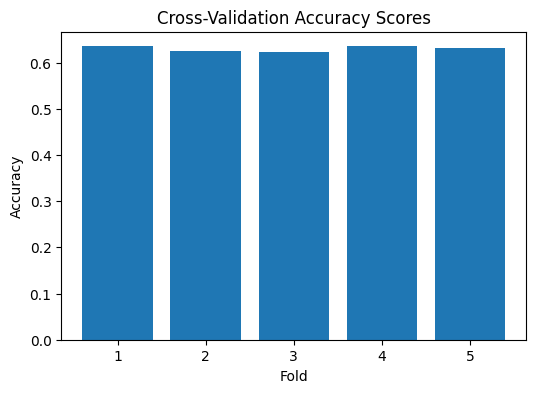

Mean Accuracy: 0.63


In [4]:
import matplotlib.pyplot as plt

# Plot the accuracy scores
plt.figure(figsize=(6, 4))
plt.bar(range(1, 6), accuracy_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores')
plt.show()

# Calculate and display the mean accuracy score
mean_accuracy = accuracy_scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
